In [239]:
import pandas as pd
df = pd.read_csv('covid_data_train.csv')

In [240]:
pd.set_option('display.max_columns', None)

In [241]:
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as scp
import pandas as pd
from tqdm import tqdm
import plotly.express as px
import itertools
%matplotlib inline
import random
from scipy.stats import uniform, sem

In [242]:
import plotly.graph_objs as go# Offline mode

In [243]:
df = df.drop('Unnamed: 0',axis=1)

In [244]:
df

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,cleanness,public_services,neighbourhood,children_places,sport_and_outdoor,shops_and_malls,public_transport,security,life_costs,inf_rate,avg_temp_min,avg_temp_max,avg_temp_std,avg_temp_median,humidity_min,humidity_max,humidity_std,humidity_median,pressure_min,pressure_max,pressure_std,pressure_median,wind_speed_ms_min,wind_speed_ms_max,wind_speed_ms_std,wind_speed_ms_median,region_x,urban_50-54_years,urban_55-59_years,urban_60-64_years,urban_65-69_years,urban_70-74_years,urban_75-79_years,urban_80-84_years,urban_85-89_years,urban_90-94_years,rural_50-54_years,rural_55-59_years,rural_60-64_years,rural_65-69_years,rural_70-74_years,rural_75-79_years,rural_80-84_years,rural_85-89_years,rural_90-94_years,work_ratio_15-72_years,work_ratio_55-64_years,work_ratio_15-24_years,work_ratio_15-64_years,work_ratio_25-54_years,num_patients_tubercul_1992,num_patients_tubercul_1993,num_patients_tubercul_1994,num_patients_tubercul_1995,num_patients_tubercul_1996,num_patients_tubercul_1997,num_patients_tubercul_1998,num_patients_tubercul_1999,num_patients_tubercul_2000,num_patients_tubercul_2001,num_patients_tubercul_2002,num_patients_tubercul_2003,num_patients_tubercul_2004,num_patients_tubercul_2005,num_patients_tubercul_2006,num_patients_tubercul_2007,num_patients_tubercul_2008,num_patients_tubercul_2009,num_patients_tubercul_2010,num_patients_tubercul_2011,num_patients_tubercul_2012,num_patients_tubercul_2013,num_patients_tubercul_2014,num_patients_tubercul_2015,num_patients_tubercul_2016,num_patients_tubercul_2017,volume_serv_household_2017,volume_serv_chargeable_2017,volume_serv_transport_2017,volume_serv_post_2017,volume_serv_accommodation_2017,volume_serv_telecom_2017,volume_serv_others_2017,volume_serv_veterinary_2017,volume_serv_housing_2017,volume_serv_education_2017,volume_serv_medicine_2017,volume_serv_disabled_2017,volume_serv_culture_2017,volume_serv_sport_2017,volume_serv_hotels_2017,volume_serv_tourism_2017,volume_serv_sanatorium_2017,num_phones_rural_2018,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386294,-12.29,5.57,4.433932,-2.57,48.71,82.43,9.471547,67.29,736.0,749.0,4.267262,741.0,1.0,9.0,2.512824,4.0,Республика Хакасия,18725.00,23155.99,24849.00,21753.00,12647.00,6409.00,6580.00,2605.00,1235.00,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,56.00,23.6,35.79,62.20,80.80,222.0,269.0,312.0,324.0,460.0,856.0,672.0,716.0,676.0,712.0,802.0,719.0,752.0,736.0,637.0,548.0,605.0,634.0,528.0,527.0,515.0,372.0,330.0,321.0,286.0,275.0,2081914.89,1.770631e+07,2089184.10,109507.89,375875.70,3580675.30,518716.10,32559.60,1706341.20,1142503.60,755546.30,178749.60,285525.89,148893.60,235566.0,138562.9,271081.59,53847.00,16199.99,21414.0,22186.0,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,NaN,26.0,93.0,61.0,11.0,25.0,64.0,45.0,51.0,5.0,31.0,17.0,1.386294,-12.29,5.57,4.433932,-2.57,48.71,82.43,9.471547,67.29,736.0,749.0,4.267262,741.0,1.0,9.0,2.512824,4.0,Республика Хакасия,18725.00,23155.99,24849.00,21753.00,12647.00,6409.00,6580.00,2605.00,1235.00,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,56.00,23.6,35.79,62.20,80.80,222.0,269.0,312.0,324.0,460.0,856.0,672.0,716.0,676.0,712.0,802.0,719.0,752.0,736.0,637.0,548.0,605.0,634.0,528.0,527.0,515.0,372.0,330.0,321.0,286.0,275.0,2081914.89,1.770631e+07,2089184.10,109507.89,375875.70,3580675.30,518716.10,32559.60,1706341.20,1142503.60,755546.30,178749.60,285525.89,148893.60,235566.0,138562.9,271081.59,53847.00,16199.99,21414.0,22186.0,0.000903,8.343086e-10,0.001

In [245]:
a = df['name'].apply(lambda x: 'абакан' in x.lower())

In [246]:
for i in a:
    if i==True:
        print("ok")

ok


In [247]:
def to_int_size(value):
    try:
        return np.log(int(value))
    except:
        return 1

In [248]:
region = df.district

In [249]:
capital = df[df['name']=='Лангепас']

In [353]:
def graph_map(df):
    fig = go.Figure(data=[go.Scattermapbox(lat=df['lat'], lon=df['lng'],text=df['name'],name='map'),
                          go.Scattermapbox(lat=df['lat'], lon=df['lng'],text=df['name'],
                                marker=dict(colorbar=dict(title="inf_rate"),
                                             color=df['inf_rate'],
                                             size=df['population'].map(to_int_size)),name='inf_rate'),
                       
                          go.Scattermapbox(lat=df['lat'], lon=df['lng'],text=df['name']+"\n"+str(df['ivl_per_100k'][df['lat']==lat,]),
                                marker=dict(colorbar=dict(title="ivl_per_100k"),
                                             color=df['ivl_per_100k'],
                                             size=df['population'].map(to_int_size)),name='ivl_per_100k')])
    map_center = go.layout.mapbox.Center(lat=float(capital['lat']), lon=float(capital['lng']))
    fig.update_coloraxes(showscale=False)
    fig.update(layout_showlegend=False)
    fig.update_layout(mapbox_style="open-street-map",mapbox=dict(center=map_center, zoom=2))
    fig.update_layout(width=1200,
    height=700,
    updatemenus=[
        dict(
            type="buttons",
            direction="up",
            buttons=list([
                dict(label="map",
                     method="restyle",
                     args=[{"visible": [True,False, False]},
                           ]),
                dict(label="inf_rate",
                     method="restyle",
                     args=[{"visible": [False,True, False]},
                          ]),
                dict(label="ivl_per_100k",
                     method="restyle",
                     args=[{"visible": [False,False, True]},
                           ]),
            ]),
        )
    ])
    fig.show()

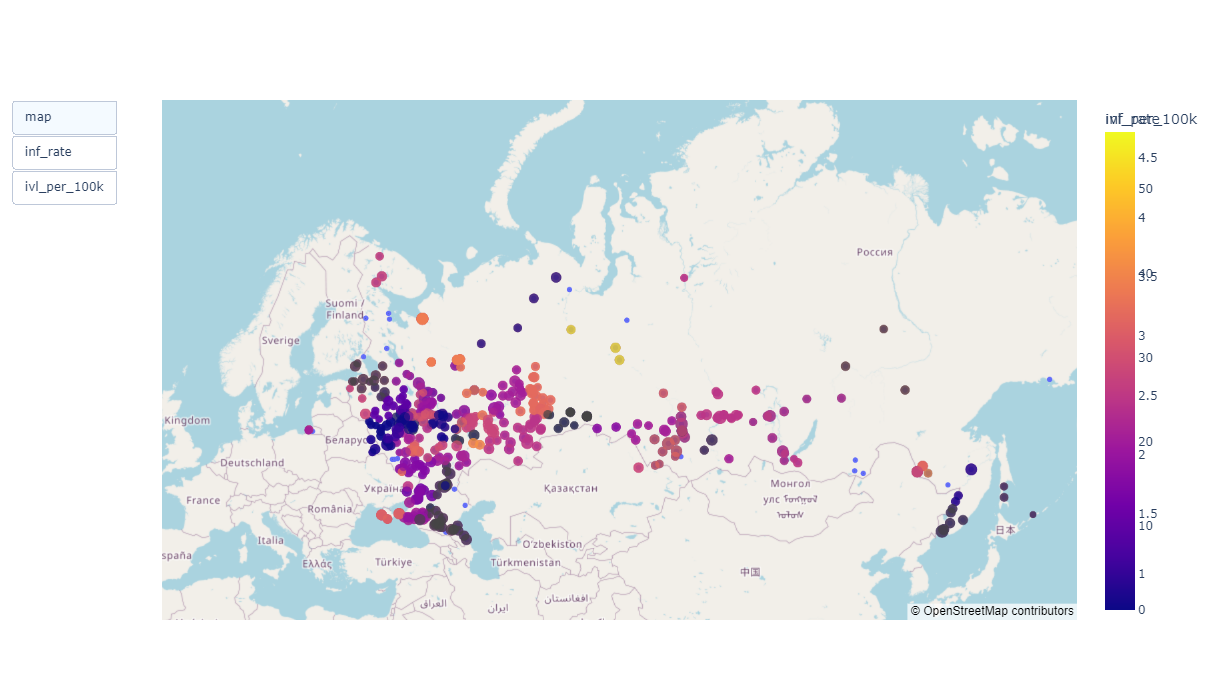

In [354]:
flag = 0
if flag==1:
    df1 = df.copy()
    df1['name']=df1['name'][region == region[list(region).index('Северо-Западный')]]
    df1['lat']=df1['lat'][region == region[list(region).index('Северо-Западный')]]
    graph_map(df1)
else:
    graph_map(df)